# Minimal Examples

In this example, we look at the simplest ways in which we can use this library. First, we calculate the bias, variance and diversity components for an ensemble with a single fixed architecture, then we look at how these components change as we vary a hyperparameter of the ensemble members (in this case, tree depth).

In [5]:
from sklearn.ensemble import RandomForestRegressor
from decompose import BVDExperiment, plot_bvd
from decompose.data_utils import load_standard_dataset


### Preparing Model and Data

We load in a dataset using `data_utils` and define a simple Random Forest regressor.

In [6]:
train_data, train_labels, test_data, test_labels = load_standard_dataset("california", 0.5, normalize_data=True)

rf_regressor = RandomForestRegressor(n_estimators=5, max_depth=10)


### Single Calculation

Computing bias, variance and diversity for a Random Forest regressor with trees of max depth 10.


In [7]:
# Create experiment object
experiment = BVDExperiment(rf_regressor, loss="squared")
# Run experiment on data
results = experiment.run_experiment(train_data, train_labels, test_data, test_labels)
# Print Summary
results.print_summary()

Average bias:
[[0.30381246]]

Average variance:
[[0.19810408]]

Diversity:
[[0.15974867]]

Ensemble expected risk:
[[0.34216787]]


### Bias-Variance-Diversity Plot

100%|██████████| 10/10 [00:57<00:00,  5.78s/it]


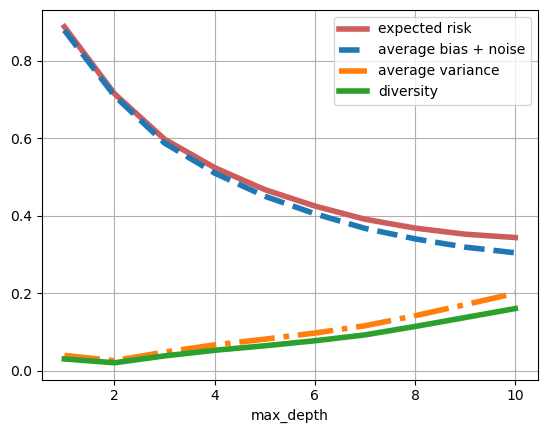

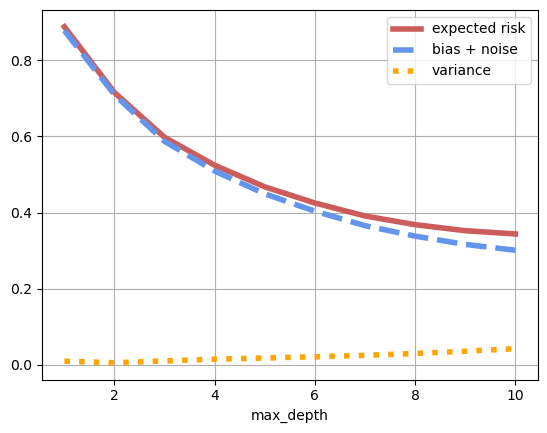

In [8]:
from decompose.plotting_utils import  plot_bv
import matplotlib.pyplot as plt

# Create experiment object and define parameter to vary
experiment = BVDExperiment(rf_regressor, loss="squared", parameter_name="max_depth",
                          parameter_values=range(1,11,1))
# Run experiment on data
experiment.run_experiment(train_data, train_labels, test_data, test_labels)
# Plot results
ax = plot_bvd(experiment)
plt.show()
plot_bv(experiment)
plt.show()